In [236]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score



In [255]:
df=pd.read_csv('/home/alexander/432/2024_bank_marketing.csv',sep=';')

In [256]:

#1a
filter1=df['job'].isin(['admin.', 'blue-collar', 'entrepreneur',
'housemaid', 'management', 'retired', 'self-employed', 'services',
'student', 'technician', 'unemployed', 'unknown'])
filter2=df['marital'].isin(['divorced', 'married', 'single',
'unknown'])
filter3=df['education'].isin(['basic.4y', 'basic.6y',
'basic.9y', 'high.school', 'illiterate',
'professional.course', 'university.degree', 'unknown'])
filter4=(df['age']>=0)&(df['age']<=123) #base on longest living person
filter5=df['default'].isin(['yes','no','unknown'])
filter6=df['housing'].isin(['yes','no','unknown'])
filter7=df['loan'].isin(['yes','no','unknown'])
filter8=df['contact'].isin(['cellular','phone'])
filter9=df['month'].isin(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
filter10=df['day_of_week'].isin(['mon', 'tue', 'wed', 'thu', 'fri'])
filter11=df['duration']>=0
filter12=df['campaign']>=0
filter13=df['pdays']<=999
filter14=df['previous']>=0
filter15=(df['emp.var.rate'] <= 100) & (df['emp.var.rate'] >= -100)
#filter 16 is skipped as there are no actual boundaries i can think of
#filter 17 is skipped as there are no acutal boundaries i can think of
#filter 18 is skipped as there are no acutal boundaries i can think of
#filter 19 is skipped as there are no acutal boundaries i can think of
filter20=df['subscription'].isin(['yes','no'])

filters={'job':filter1,'marital':filter2,'education':filter3,'age':filter4,'default':filter5,'housing':filter6,'loan':filter7,'contact':filter8,'month':filter9,'day_of_week':filter10,'duration':filter11,'campaign':filter12,'pdays':filter13,'previous':filter14,'emp.var.rate':filter15,'subscription':filter20}
for f in filters:
    print("Testing filter:",f)
    failed=df[~filters[f]]

    if(failed.empty==True):
        print("Attribute Value Validated")
    if(failed.empty==False):
        print("Check attr")
        
        for i,r in failed.iterrows():
            
            print(f"Id{r['id']} didnt pass the filter due to value {r[f]}")
            df.drop(i,inplace=True)
            print('row dropped')

Testing filter: job
Attribute Value Validated
Testing filter: marital
Attribute Value Validated
Testing filter: education
Attribute Value Validated
Testing filter: age
Attribute Value Validated
Testing filter: default
Attribute Value Validated
Testing filter: housing
Attribute Value Validated
Testing filter: loan
Attribute Value Validated
Testing filter: contact
Check attr
Id0 didnt pass the filter due to value telephone
row dropped
Id1 didnt pass the filter due to value telephone
row dropped
Id2 didnt pass the filter due to value telephone
row dropped
Id3 didnt pass the filter due to value telephone
row dropped
Id4 didnt pass the filter due to value telephone
row dropped
Id6 didnt pass the filter due to value telephone
row dropped
Id7 didnt pass the filter due to value telephone
row dropped
Id10 didnt pass the filter due to value telephone
row dropped
Id14 didnt pass the filter due to value telephone
row dropped
Id20 didnt pass the filter due to value telephone
row dropped
Id21 didnt 

/tmp/ipykernel_3059670/3571439870.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  failed=df[~filters[f]]
/tmp/ipykernel_3059670/3571439870.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  failed=df[~filters[f]]
/tmp/ipykernel_3059670/3571439870.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  failed=df[~filters[f]]
/tmp/ipykernel_3059670/3571439870.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  failed=df[~filters[f]]
/tmp/ipykernel_3059670/3571439870.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  failed=df[~filters[f]]
/tmp/ipykernel_3059670/3571439870.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  failed=df[~filters[f]]
/tmp/ipykernel_3059670/3571439870.py:31: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  failed=df[~filters[f]]
/tmp/i

In [56]:
#1b
for i,r in df.iterrows():
    if(r.isna().any()):
        print(f"Row {r['id']} contains missing value, row dropped")
        df.drop(i)
    

count     25376
unique        2
top          no
freq      21636
Name: subscription, dtype: object


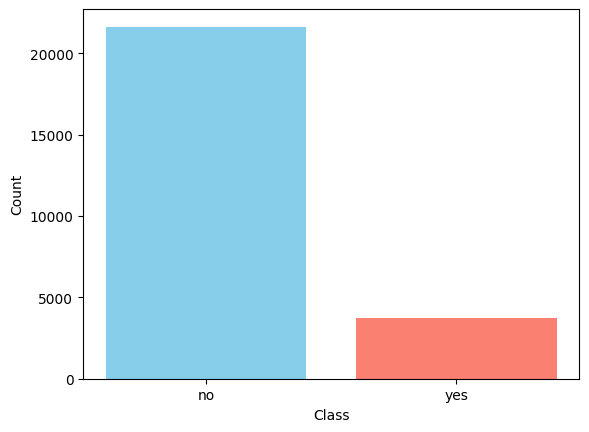

In [62]:
#1c
print(df['subscription'].describe())
plt.bar(df['subscription'].value_counts().index,df['subscription'].value_counts().values, color=['skyblue','salmon'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [65]:
print(df['cons.price.idx'].describe())
print("Mode: ",df['cons.price.idx'].mode())
print("Freq:" ,df['cons.price.idx'].value_counts()[df['cons.price.idx'].mode()])
print(df['cons.conf.idx'].describe())
print("Mode: ",df['cons.conf.idx'].mode())
print("Freq:" ,df['cons.conf.idx'].value_counts()[df['cons.conf.idx'].mode()])
price=df['cons.price.idx'].value_counts()
conf=df['cons.conf.idx'].value_counts()

count    25376.000000
mean        93.313457
std          0.488031
min         92.201000
25%         92.893000
50%         93.200000
75%         93.918000
max         94.767000
Name: cons.price.idx, dtype: float64
Mode:  0    93.918
Name: cons.price.idx, dtype: float64
Freq: cons.price.idx
93.918    5521
Name: count, dtype: int64
count    25376.000000
mean       -41.372557
std          5.009764
min        -50.800000
25%        -46.200000
50%        -42.700000
75%        -36.100000
max        -26.900000
Name: cons.conf.idx, dtype: float64
Mode:  0   -42.7
Name: cons.conf.idx, dtype: float64
Freq: cons.conf.idx
-42.7    5521
Name: count, dtype: int64


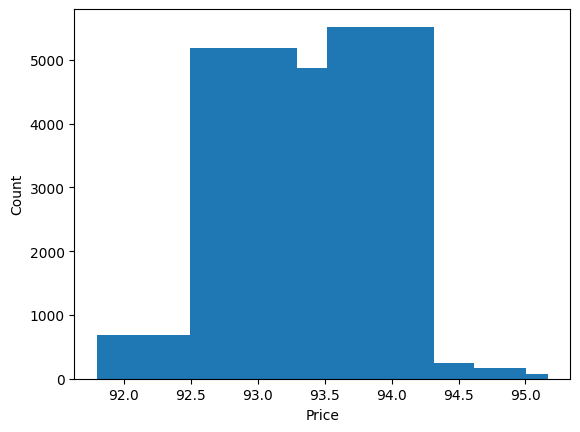

In [79]:


plt.bar(price.index,price.values)
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

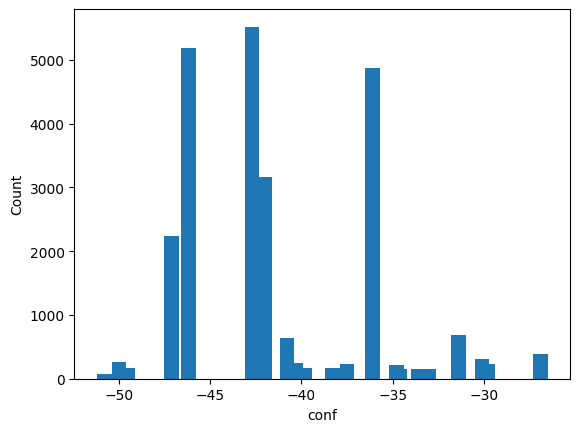

In [80]:
plt.bar(conf.index,conf.values)
plt.xlabel('conf')
plt.ylabel('Count')
plt.show()

In [88]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                        'contact', 'month', 'day_of_week', 'poutcome']
target='subscription'
chi_a=[]
for features in categorical_features:
    chi,p,dof,exp=chi2_contingency(pd.crosstab(df[features], df[target]))
    
    chi_a.append({features:chi})
chi_a.sort(key=lambda x: list(x.values())[0], reverse=True)
for ele in chi_a:
    print(ele)
    print('\n')    
            


{'poutcome': np.float64(2625.605209599122)}


{'month': np.float64(2408.9318726486854)}


{'job': np.float64(697.1817859110762)}


{'default': np.float64(261.454960967347)}


{'education': np.float64(108.12295202887016)}


{'marital': np.float64(65.50421123111289)}


{'day_of_week': np.float64(23.036446342475994)}


{'loan': np.float64(1.9965325986068438)}


{'housing': np.float64(1.351303511943404)}


{'contact': 0.0}




In [187]:
continuous_features = ['age', 'duration', 'campaign', 'pdays', 'previous','emp.var.rate', 
                       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
target='subscription'
MI_a=[]
for feature in continuous_features:
    MI = mutual_info_classif(df[[feature]], df[target], discrete_features=False)
    MI_a.append({feature:MI[0]})
MI_a.sort(key=lambda x: list(x.values())[0], reverse=True)
for ele in MI_a:
    print(ele)
    print('\n')   

{'duration': np.float64(0.08914381758930667)}


{'euribor3m': np.float64(0.08595323954513834)}


{'cons.conf.idx': np.float64(0.08168058904832742)}


{'cons.price.idx': np.float64(0.07976012855778292)}


{'nr.employed': np.float64(0.07703193131422892)}


{'emp.var.rate': np.float64(0.06473519723062582)}


{'pdays': np.float64(0.041828469279766134)}


{'previous': np.float64(0.019244546679252572)}


{'age': np.float64(0.011337043768076427)}


{'campaign': np.float64(0.0038623153334857996)}




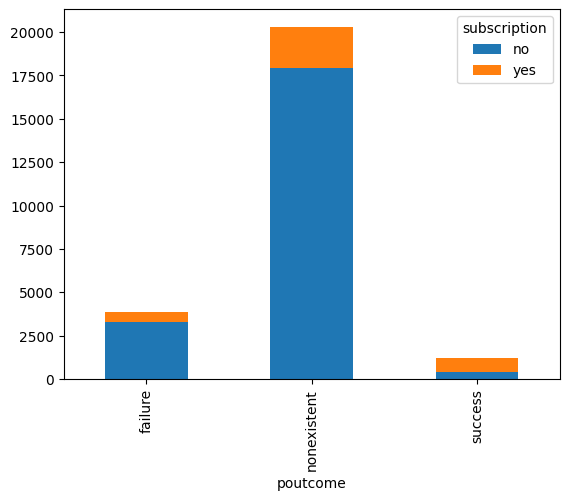

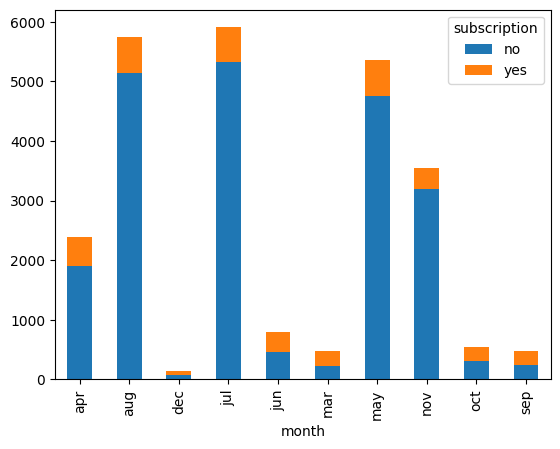

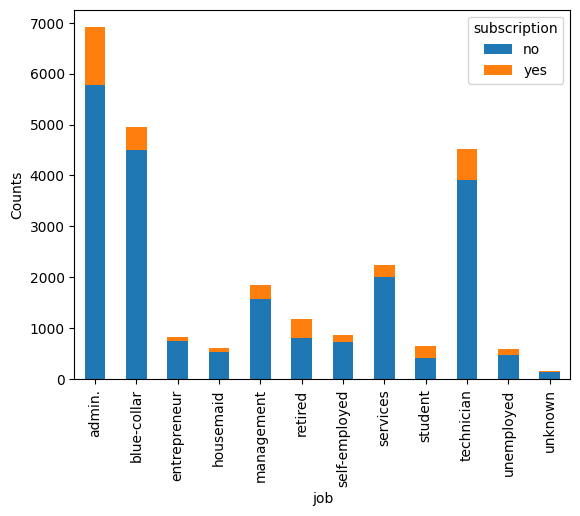

In [119]:
#categorical
#high 3
poc=df['poutcome'].value_counts()
month=df['month'].value_counts()
job=df['job'].value_counts()
target=df['subscription'].value_counts()
p1 = df.groupby(['poutcome', 'subscription']).size().unstack(fill_value=0)
p2 = df.groupby(['month', 'subscription']).size().unstack(fill_value=0)
p3 = df.groupby(['job', 'subscription']).size().unstack(fill_value=0)
ax = p1.plot(kind='bar', stacked=True)
ax.set_xlabel('poutcome')
ax2 = p2.plot(kind='bar', stacked=True)
ax2.set_xlabel('month')
ax3=p3.plot(kind='bar', stacked=True)
ax3.set_xlabel('job')


#ax.bar(x,df_all['month'], label='month')
#ax.bar(job.index,job.values, label='job')

plt.ylabel('Counts')
plt.show()
#low 3 




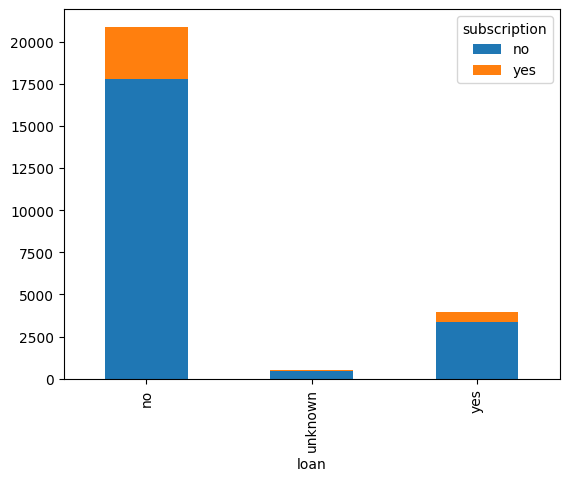

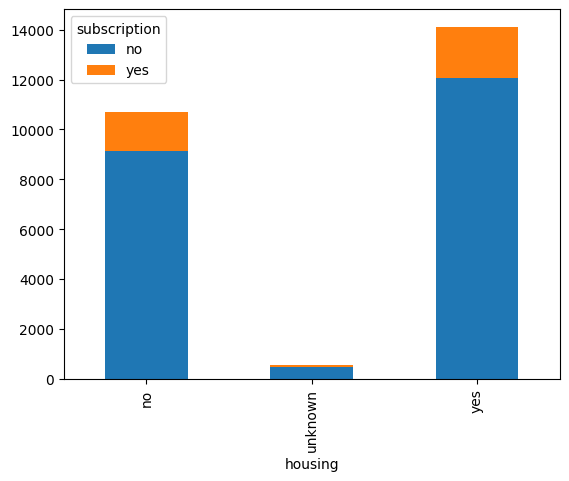

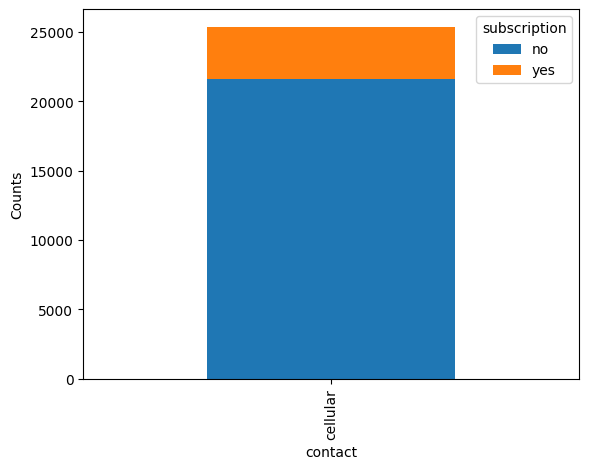

In [121]:
loan=df['loan'].value_counts
house=df['housing'].value_counts
contact=df['contact'].value_counts
target=df['subscription'].value_counts()
p1 = df.groupby(['loan', 'subscription']).size().unstack(fill_value=0)
p2 = df.groupby(['housing', 'subscription']).size().unstack(fill_value=0)
p3 = df.groupby(['contact', 'subscription']).size().unstack(fill_value=0)
ax = p1.plot(kind='bar', stacked=True)
ax.set_xlabel('loan')
ax2 = p2.plot(kind='bar', stacked=True)
ax2.set_xlabel('housing')
ax3=p3.plot(kind='bar', stacked=True)
ax3.set_xlabel('contact')


#ax.bar(x,df_all['month'], label='month')
#ax.bar(job.index,job.values, label='job')

plt.ylabel('Counts')
plt.show()


/tmp/ipykernel_3059670/2325051133.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = df.groupby(['euribor3m_binned', 'subscription']).size().unstack(fill_value=0)
/tmp/ipykernel_3059670/2325051133.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p2 = df.groupby(['duration_binned', 'subscription']).size().unstack(fill_value=0)
/tmp/ipykernel_3059670/2325051133.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p

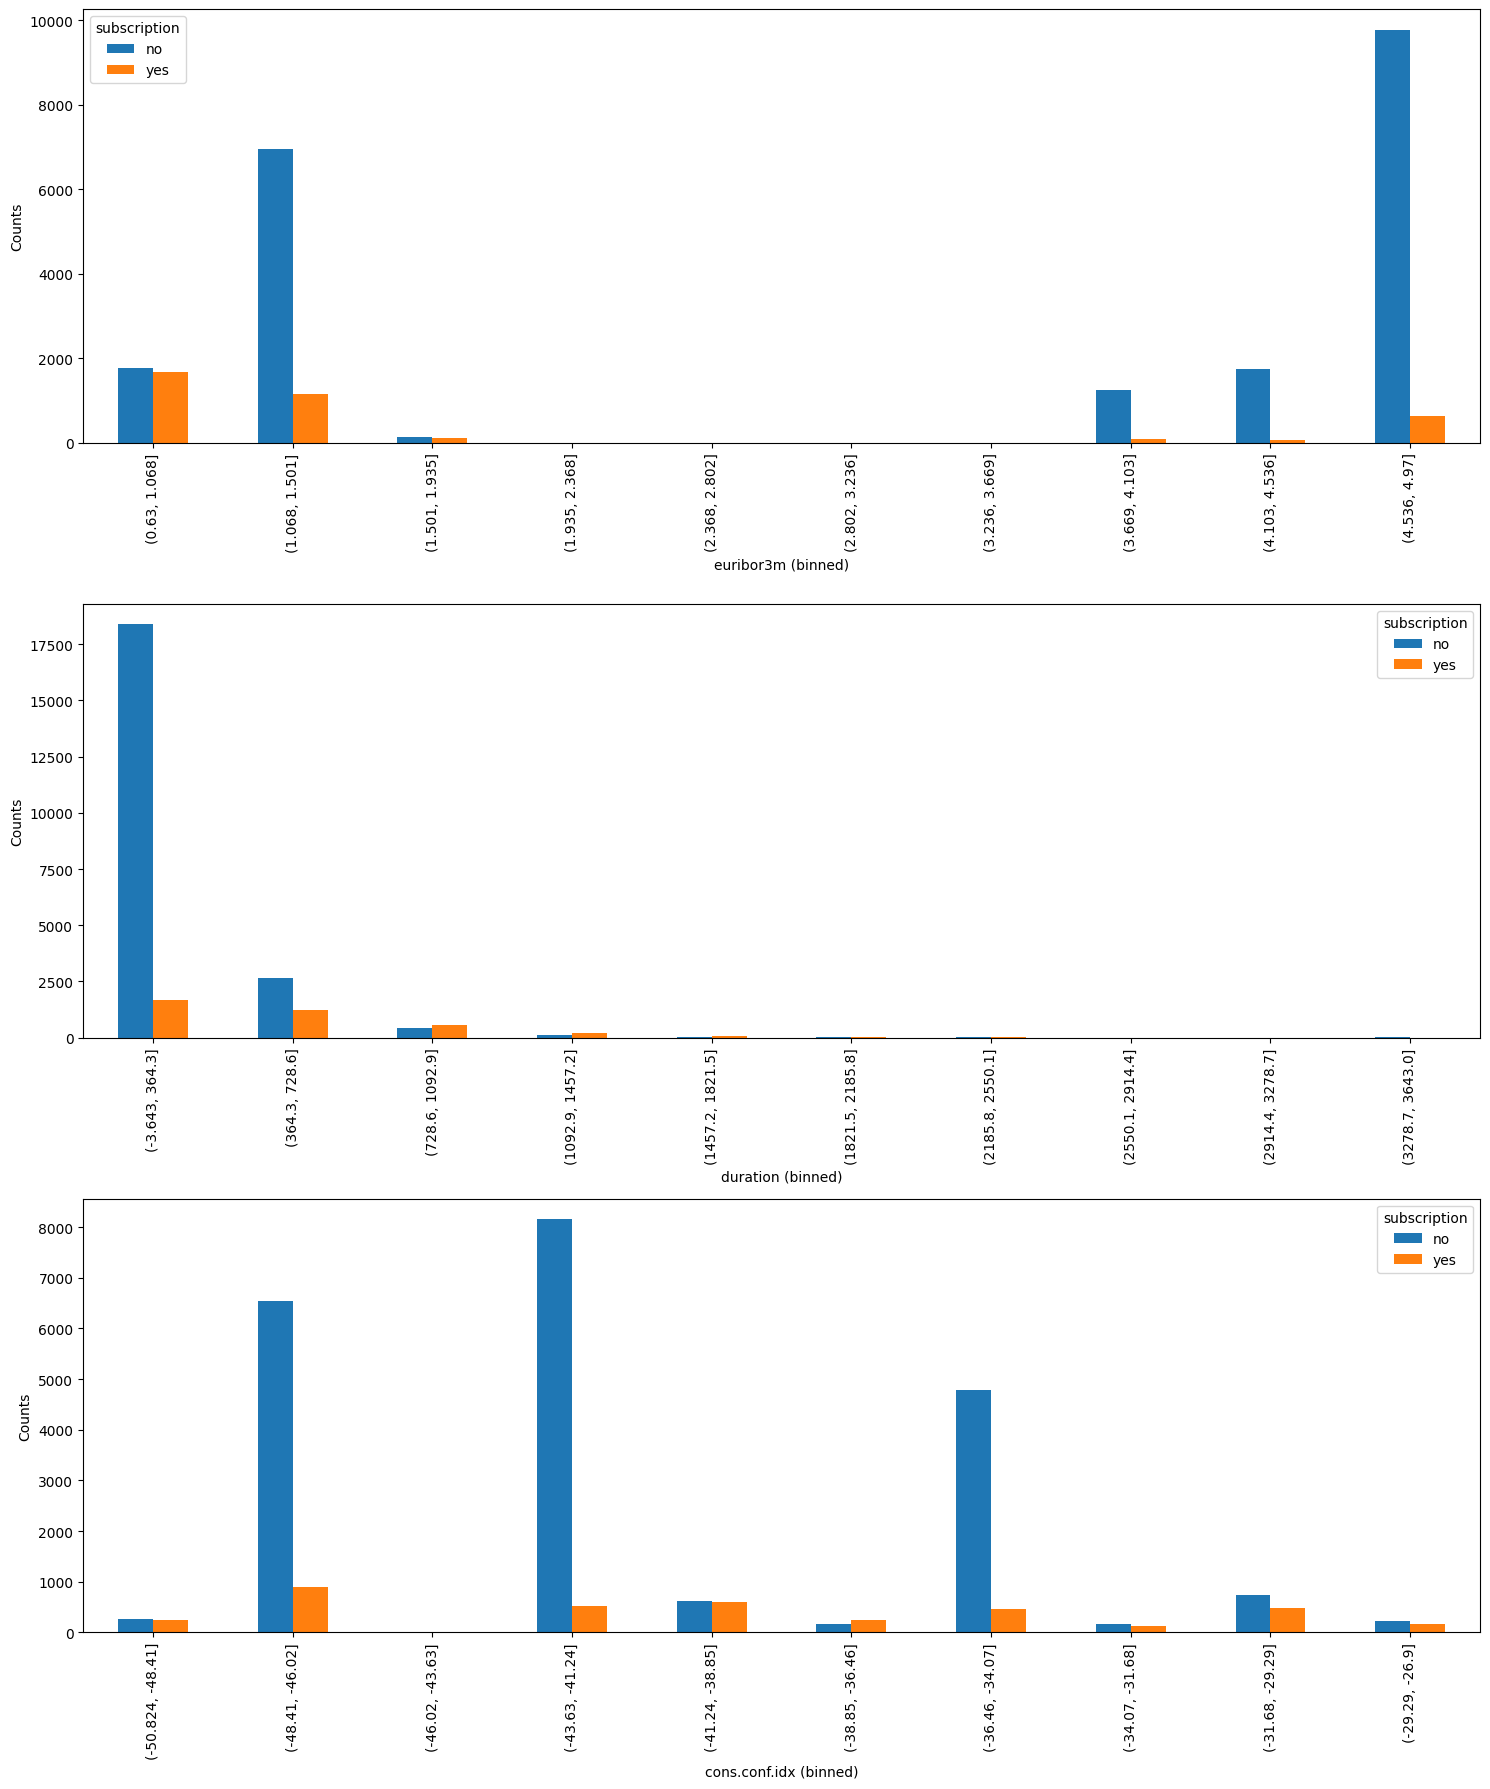

In [134]:

df2=df.copy()
df['euribor3m_binned'] = pd.cut(df['euribor3m'], bins=10)
df['duration_binned'] = pd.cut(df['duration'], bins=10)    
df['cons_conf_binned'] = pd.cut(df['cons.conf.idx'], bins=10)  


p1 = df.groupby(['euribor3m_binned', 'subscription']).size().unstack(fill_value=0)
p2 = df.groupby(['duration_binned', 'subscription']).size().unstack(fill_value=0)
p3 = df.groupby(['cons_conf_binned', 'subscription']).size().unstack(fill_value=0)

# Plotting each feature in a grouped bar chart with subplots
fig, axes = plt.subplots(3, 1,figsize=(15, 18))

# Plot for euribor3m (binned)
p1.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('euribor3m (binned)')
axes[0].set_ylabel('Counts')


# Plot for duration (binned)
p2.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('duration (binned)')
axes[1].set_ylabel('Counts')


# Plot for cons.conf.idx (binned)
p3.plot(kind='bar', ax=axes[2])
axes[2].set_xlabel('cons.conf.idx (binned)')
axes[2].set_ylabel('Counts')


# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()
df=df2


/tmp/ipykernel_3059670/4052308309.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p1 = df.groupby(['previous_binned', 'subscription']).size().unstack(fill_value=0)
/tmp/ipykernel_3059670/4052308309.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p2 = df.groupby(['age_binned', 'subscription']).size().unstack(fill_value=0)
/tmp/ipykernel_3059670/4052308309.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p3 = df

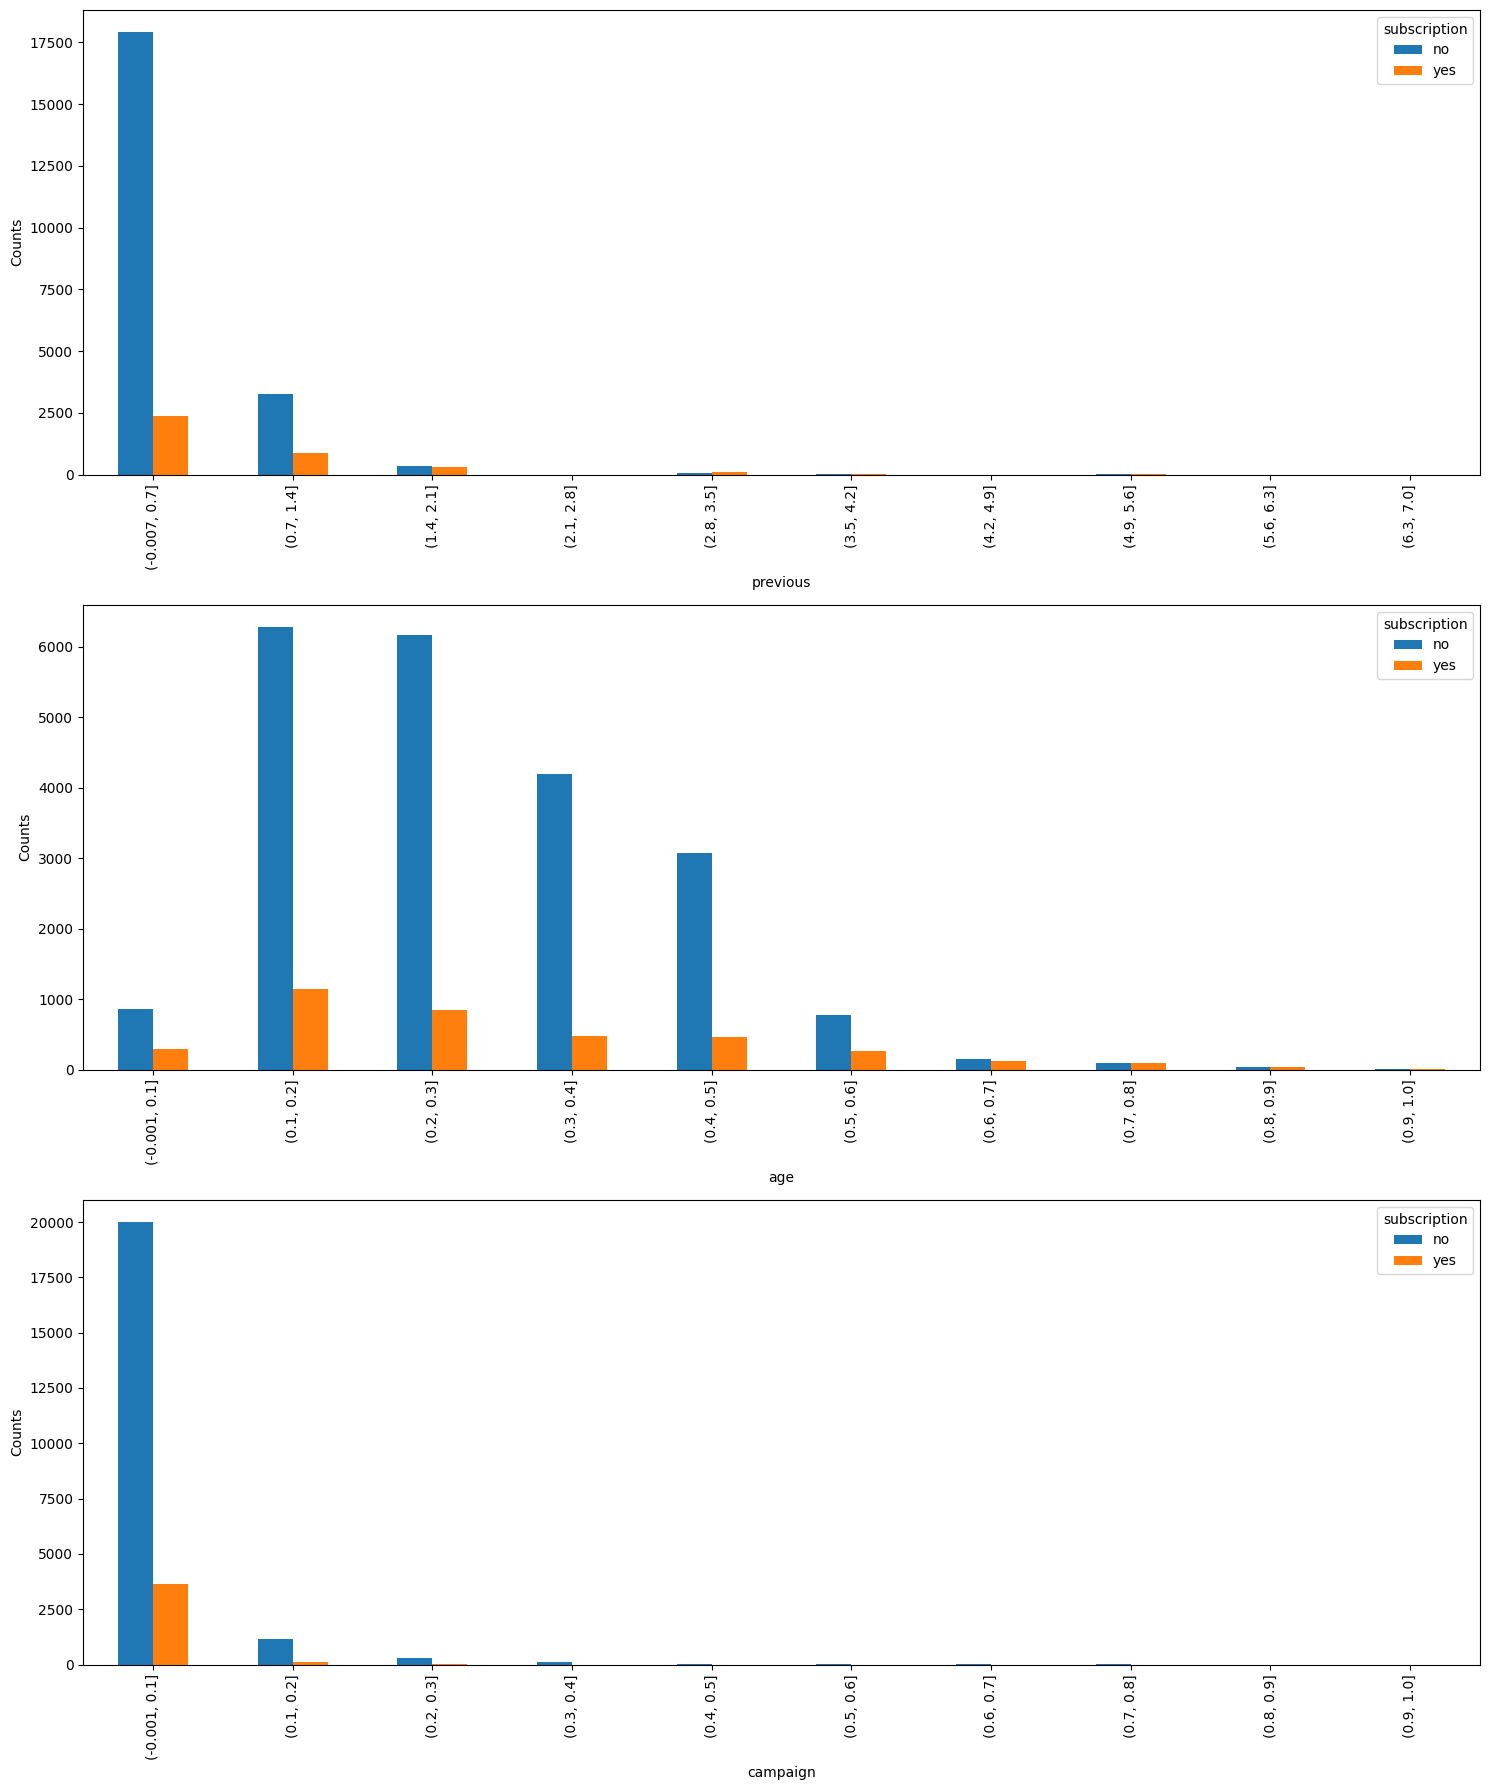

In [189]:
df2=df.copy()
df['previous_binned'] = pd.cut(df['previous'], bins=10)
df['age_binned'] = pd.cut(df['age'], bins=10)    
df['campaign_binned'] = pd.cut(df['campaign'], bins=10)  


p1 = df.groupby(['previous_binned', 'subscription']).size().unstack(fill_value=0)
p2 = df.groupby(['age_binned', 'subscription']).size().unstack(fill_value=0)
p3 = df.groupby(['campaign_binned', 'subscription']).size().unstack(fill_value=0)

fig, axes = plt.subplots(3, 1,figsize=(15, 18))

p1.plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('previous')
axes[0].set_ylabel('Counts')


p2.plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('age')
axes[1].set_ylabel('Counts')

p3.plot(kind='bar', ax=axes[2])
axes[2].set_xlabel('campaign')
axes[2].set_ylabel('Counts')

plt.tight_layout()

plt.show()
df=df2

In [257]:
df['prev_contaced_info'] = df['day_of_week']+"_"+df['duration'].astype(str)
cols = df.columns.tolist()
cols.remove('subscription')
cols.append('subscription')
df = df[cols]
print(df.head())


    id  age            job  marital            education  default housing  \
5    5   55        retired  married          high.school       no     yes   
8    8   33    blue-collar  married             basic.9y  unknown     yes   
9    9   43         admin.  married          high.school       no     yes   
11  11   29  self-employed  married    university.degree       no     yes   
12  12   37     technician   single  professional.course       no     yes   

   loan   contact month  ...  pdays  previous     poutcome  emp.var.rate  \
5   yes  cellular   jun  ...  999.0         0  nonexistent          -2.9   
8    no  cellular   may  ...  999.0         0  nonexistent          -1.8   
9    no  cellular   may  ...  999.0         1      failure          -1.8   
11   no  cellular   jul  ...  999.0         0  nonexistent           1.4   
12   no  cellular   aug  ...  999.0         0  nonexistent           1.4   

    cons.price.idx cons.conf.idx  euribor3m  nr.employed  prev_contaced_info  \


In [214]:

df2=df.copy()
features = ['age','duration', 'campaign', 'pdays', 'emp.var.rate', 
                      'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed','previous']


for feature in features:
    min_value = df[feature].min()
    max_value = df[feature].max()
    scaler=MinMaxScaler()
    df[feature] = scaler.fit_transform(df[[feature]])
    print(f"Feature: {feature}")
    print(f"Original range: [{min_value}, {max_value}]")
    print(f"Normalized range: [{df[feature].min()}, {df[feature].max()}]\n")
df_normal=df
for col in df_normal:
    if col not in features:      
        df_normal.drop(columns=col,inplace=True)
df=df2


Feature: age
Original range: [17, 98]
Normalized range: [0.0, 1.0]

Feature: duration
Original range: [0, 3643]
Normalized range: [0.0, 0.9999999999999999]

Feature: campaign
Original range: [1, 43]
Normalized range: [0.0, 0.9999999999999999]

Feature: pdays
Original range: [0.0, 999.0]
Normalized range: [0.0, 1.0]

Feature: emp.var.rate
Original range: [-3.4, 1.4]
Normalized range: [0.0, 1.0]

Feature: cons.price.idx
Original range: [92.201, 94.767]
Normalized range: [0.0, 1.0]

Feature: cons.conf.idx
Original range: [-50.8, -26.9]
Normalized range: [0.0, 1.0]

Feature: euribor3m
Original range: [0.634, 4.97]
Normalized range: [0.0, 1.0000000000000002]

Feature: nr.employed
Original range: [4963.6, 5228.1]
Normalized range: [0.0, 1.0]

Feature: previous
Original range: [0, 7]
Normalized range: [0.0, 1.0]



In [ ]:
#
df2=df.copy()
df_t=df.copy()
categorical= ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                                  'contact', 'month', 'day_of_week', 'poutcome']


for feature in categorical:
    encode=pd.get_dummies(df[feature],prefix=f"{feature}_is")
    df=pd.concat([df,encode],axis=1)
    df.drop(columns=feature,inplace=True)
for col in df_normal:
    if col not in features:      
        df_normal.drop(columns=col,inplace=True)

df_encode=df
# Count and report the number of times value 1 occurs for each new binary feature
for feature in categorical:
    prefix = f"{feature}_is"
    for col in df.columns:
        if col.startswith(prefix):
            print(f"Feature:{col}:{df[col].sum()}")

df=df2

Feature:job_is_admin.:6910
Feature:job_is_blue-collar:4942
Feature:job_is_entrepreneur:835
Feature:job_is_housemaid:615
Feature:job_is_management:1841
Feature:job_is_retired:1192
Feature:job_is_self-employed:863
Feature:job_is_services:2244
Feature:job_is_student:658
Feature:job_is_technician:4514
Feature:job_is_unemployed:600
Feature:job_is_unknown:162
Feature:marital_is_divorced:2833
Feature:marital_is_married:14740
Feature:marital_is_single:7751
Feature:marital_is_unknown:52
Feature:education_is_basic.4y:2290
Feature:education_is_basic.6y:1212
Feature:education_is_basic.9y:3357
Feature:education_is_high.school:5743
Feature:education_is_illiterate:15
Feature:education_is_professional.course:3379
Feature:education_is_university.degree:8387
Feature:education_is_unknown:993
Feature:default_is_no:21139
Feature:default_is_unknown:4234
Feature:default_is_yes:3
Feature:housing_is_no:10709
Feature:housing_is_unknown:547
Feature:housing_is_yes:14120
Feature:loan_is_no:20884
Feature:loan_is_un

In [217]:
df_encode.head()

,job_is_admin.,job_is_blue-collar,job_is_entrepreneur,job_is_housemaid,job_is_management,job_is_retired,job_is_self-employed,job_is_services,job_is_student,job_is_technician,...,prev_contaced_info_is_wed_976,prev_contaced_info_is_wed_979,prev_contaced_info_is_wed_98,prev_contaced_info_is_wed_984,prev_contaced_info_is_wed_988,prev_contaced_info_is_wed_99,prev_contaced_info_is_wed_990,prev_contaced_info_is_wed_993,prev_contaced_info_is_wed_996,prev_contaced_info_is_wed_998
5,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [227]:
x=df_normal
y=df['subscription']
model_normal = DecisionTreeClassifier(random_state=42)
model_normal.fit(x,y)

DecisionTreeClassifier(random_state=42)

In [220]:
x=df_encode
y = df['subscription'].map({'yes': 1, 'no': 0})
model_encode = DecisionTreeClassifier(random_state=42)
model_encode.fit(x,y)

DecisionTreeClassifier(random_state=42)

In [229]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
kf = KFold(n_splits=4, shuffle=True, random_state=42)
model1_r= cross_validate(model_normal, df_normal, y, cv=kf, scoring=scoring)
print("ACC:",model1_r['test_accuracy'].mean())
print("precision:",model1_r['test_precision'].mean())
print("recall:",model1_r['test_recall'].mean())
print("f1:",model1_r['test_f1'].mean())

ACC: 0.861640920554855
precision: 0.530327049185078
recall: 0.5420809683624422
f1: 0.5359825506814181


In [230]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
kf = KFold(n_splits=4, shuffle=True, random_state=42)
model2_r= cross_validate(model_encode, df_encode, y, cv=kf, scoring=scoring)
print("ACC:",model2_r['test_accuracy'].mean())
print("precision:",model2_r['test_precision'].mean())
print("recall:",model2_r['test_recall'].mean())
print("f1:",model2_r['test_f1'].mean())

ACC: 0.8465479192938209
precision: 0.4698227759872303
recall: 0.3102396085104806
f1: 0.37347769591116


In [244]:

df_subset=df.copy()
target_numerical_features=['duration','euribor3m','cons.conf.idx']
target_categorical_features=['poutcome','month','job']
for col in df_subset:
    if col not in target_numerical_features and col not in target_categorical_features :
        df_subset.drop(columns=col,inplace=True)
df_subset.head()

,job,month,duration,poutcome,cons.conf.idx,euribor3m
5,retired,jun,186,nonexistent,-40.8,1.268
8,blue-collar,may,8,nonexistent,-46.2,1.250
9,admin.,may,126,failure,-46.2,1.250
11,self-employed,jul,503,nonexistent,-42.7,4.961
12,technician,aug,286,nonexistent,-36.1,4.964


In [246]:
ohc=OneHotEncoder(handle_unknown='ignore', sparse_output=False)

enc=ohc.fit_transform(df_subset[target_categorical_features])
df_enc=pd.DataFrame(enc,columns=ohc.get_feature_names_out(target_categorical_features))
df_subset.reset_index(drop=True, inplace=True)
df_enc.reset_index(drop=True, inplace=True)
df_test=pd.concat([df_subset[target_numerical_features],df_enc],axis=1)
y2 = df['subscription'].map({'yes': 1, 'no': 0})
model_sub = DecisionTreeClassifier(random_state=42)
model_sub.fit(df_test,y2)

scoring = ['accuracy', 'precision', 'recall', 'f1']
kf = KFold(n_splits=4, shuffle=True, random_state=42)
model3_r= cross_validate(model_sub, df_test, y2, cv=kf, scoring=scoring)
print("ACC:",model3_r['test_accuracy'].mean())
print("precision:",model3_r['test_precision'].mean())
print("recall:",model3_r['test_recall'].mean())
print("f1:",model3_r['test_f1'].mean())

ACC: 0.8624290668348045
precision: 0.5338371632154636
recall: 0.5357272929037029
f1: 0.5345816166707286
